### **L06_gaussian (normal) distribution (prática)**
######Utilizando a base de dados "breast_cancer" faça--- essa base de dados "breast cancer" está disponível na própria biblioteca do scikit. Também é fácil achar essa base na internet, em outros formatos (txt, csv, etc), se seja da preferência.
#####1 - Verifique se as suas características seguem uma distribuição gaussiana

*   Utilize ao menos 2 verificações diferentes, a sua escolha (ex: QQplot, scatterplot, histograma, skewness...)

#####2 - Verifique a correlação/covariância dos seus dados

*   Utilize ao menos 2 verificações diferentes, a sua escolha (ex: heatmap, scatterplot matrix...)

#####3 - Para aqueles dados que seguirem uma distribuição Gaussiana (ou aproximadamente) verifique se há outliers.
* Utilize qualquer técnica que julgar adequada (univariada ou multivariada), justificando a escolha




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df_cancer.shape

In [ ]:
df_cancer.isna().sum()

######0.0 = Maligno
######1.0 = Benigno

In [ ]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


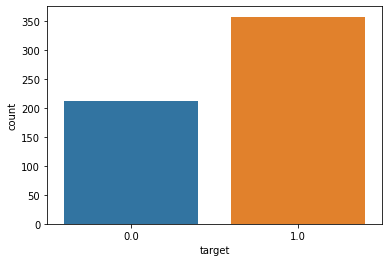

In [ ]:
import seaborn as sns
sns.countplot(df_cancer['target'],label='count')

###### Usando pairplot para visualizar todos os dados usando a biblioteca seaborn. 
#####Usando as primeiros seis colunas para plotar os dados ('mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness')
######Os pontos azuis indicam um caso maligno que representa uma ameaça à vida e os pontos laranja representam Benigno.

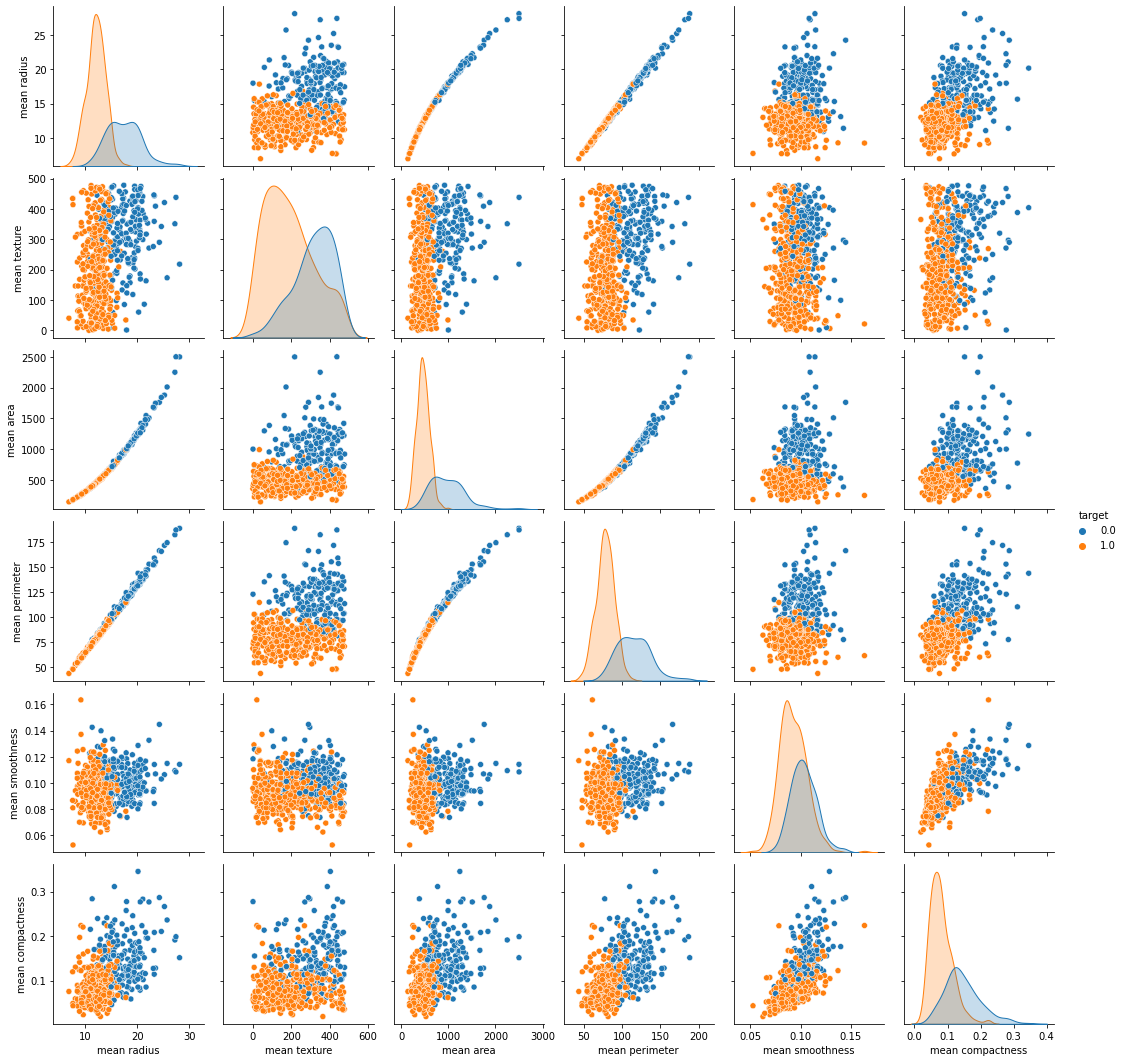

In [ ]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness'])

######Outra forma de visualização

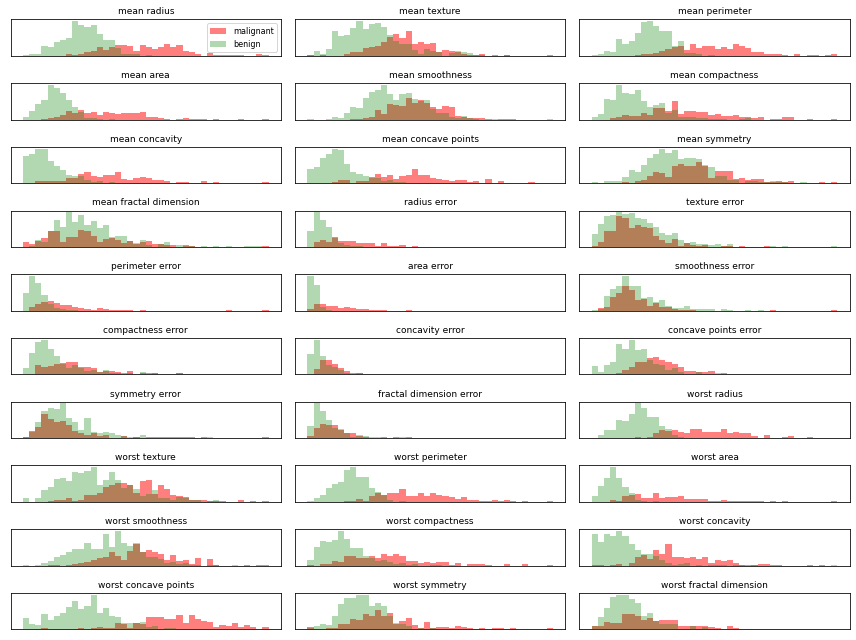

In [ ]:
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 colunas com 10 figuras cada (3*10=30 figuras no total)
malignant=cancer.data[cancer.target==0] # definindo cancer maligno
benign=cancer.data[cancer.target==1] # definindo cancer benigno
ax=axes.ravel()
for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# cor rosa para Maligno 
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha é para transparência na região sobreposta 
  ax[i].set_title(cancer.feature_names[i],fontsize=9) # adicionando os títulos 
  ax[i].axes.get_xaxis().set_visible(False) # Não mostrar a coordenada x de ax
  ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# tight_layout: Ajusta o preenchimento entre e ao redor dos subtramas.
plt.show()

######Correlação entre as colunas

In [ ]:
df_cancer.corr()

######Usando seaborn heatmap



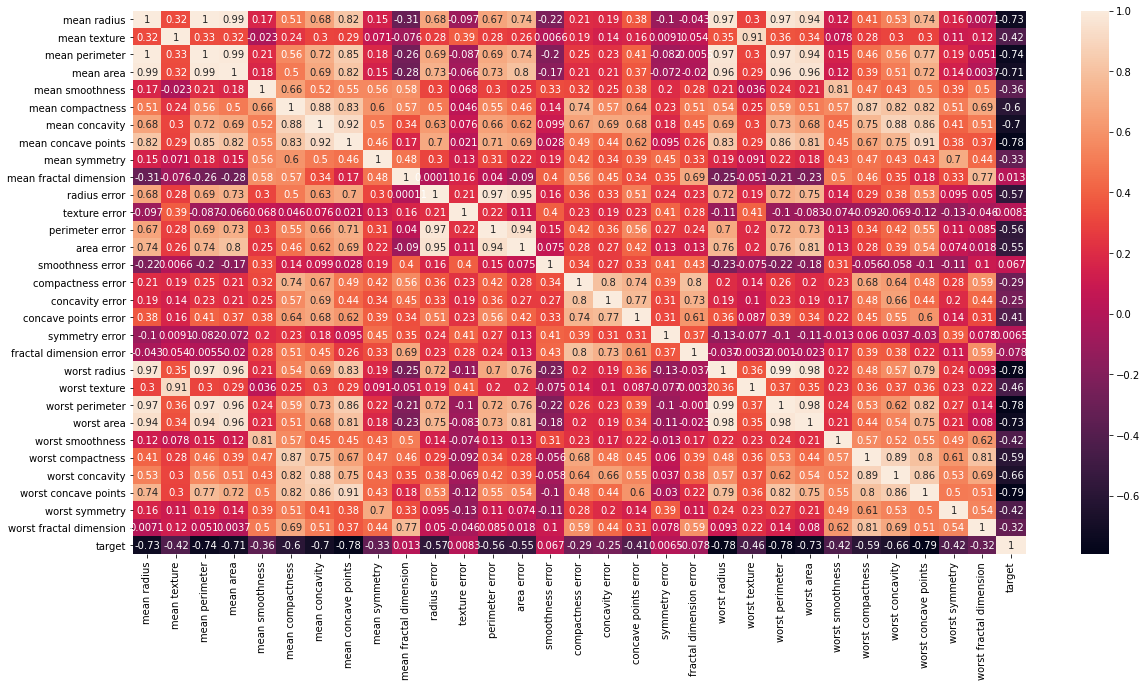

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(),annot=True)

Verificando a Covariância

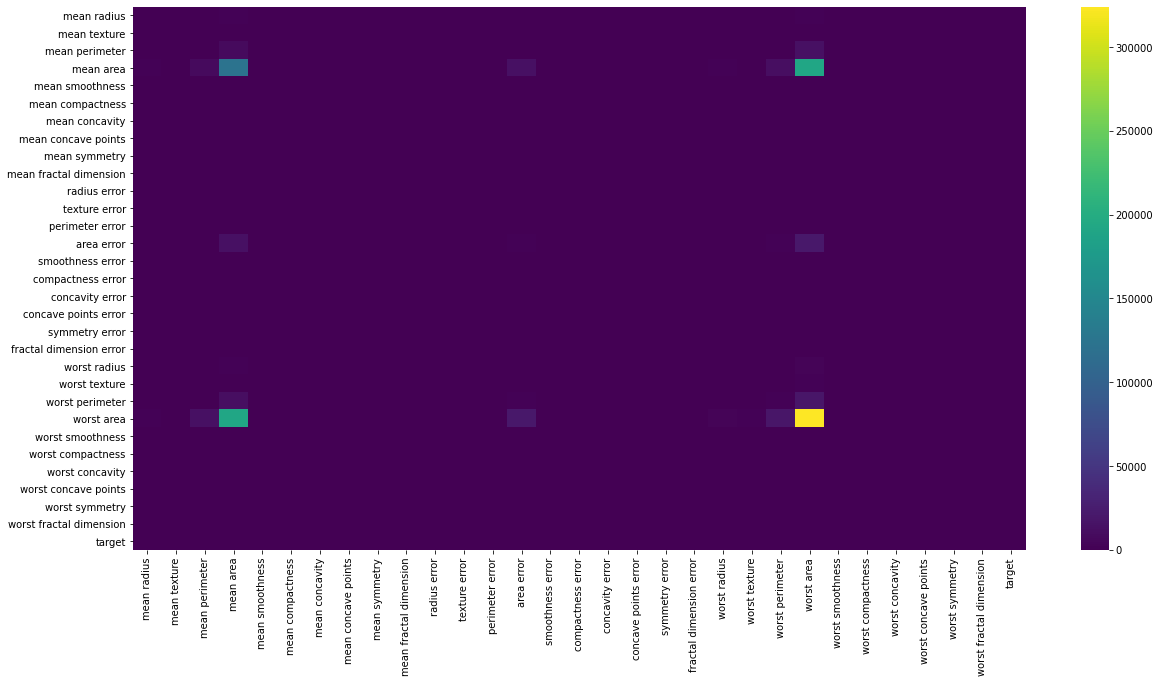

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.cov(),annot=False, cmap='viridis')